In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as sl
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Data/1906/problem_2_train.csv")

In [3]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [4]:
data.describe(include='all')

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
count,6.250000e+03,6250,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250,6250,6250.000000,6250,6250,6250,6250.000000,6250,6250.000000
unique,NaN,38,NaN,NaN,NaN,NaN,NaN,5,2,NaN,624,782,81,NaN,83,NaN
top,NaN,AN,NaN,NaN,NaN,NaN,NaN,A,ADLD,NaN,2017-10-23,2017-05-02,2018-01-31,NaN,2018-02-26,NaN
freq,NaN,2497,NaN,NaN,NaN,NaN,NaN,4020,6246,NaN,44,63,117,NaN,152,NaN
mean,2.946134e+06,NaN,11.732000,340546.139840,232.654400,231.495360,155.040480,NaN,NaN,366009.473440,NaN,NaN,NaN,4457.158080,NaN,12.730400
std,7.733480e+04,NaN,9.141463,213449.097822,30.471658,22.521945,41.883918,NaN,NaN,210990.167946,NaN,NaN,NaN,200.945634,NaN,5.075533
min,2.818359e+06,NaN,0.000000,0.000000,0.000000,0.000000,131.000000,NaN,NaN,0.000000,NaN,NaN,NaN,4008.000000,NaN,2.000000
25%,2.877226e+06,NaN,3.000000,110018.000000,233.000000,233.000000,131.000000,NaN,NaN,135034.000000,NaN,NaN,NaN,4398.000000,NaN,9.000000
50%,2.944426e+06,NaN,8.000000,400001.000000,233.000000,233.000000,131.000000,NaN,NaN,395001.500000,NaN,NaN,NaN,4474.000000,NaN,12.000000
75%,3.012237e+06,NaN,21.000000,500004.000000,233.000000,233.000000,131.000000,NaN,NaN,560016.000000,NaN,NaN,NaN,4580.000000,NaN,15.000000


In [5]:
data.shape

(6250, 16)

In [6]:
data.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

In [7]:
data['tat_in_days'].value_counts().head()

10    672
9     631
11    610
12    604
13    492
Name: tat_in_days, dtype: int64

In [8]:
data.corr()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
srno,1.000000,0.277127,-0.026209,0.082192,0.011729,0.039475,-0.011257,0.125644,-0.193610
hubid,0.277127,1.000000,-0.055715,0.033957,-0.001304,-0.151538,-0.022918,0.451190,-0.121613
hubpincode,-0.026209,-0.055715,1.000000,-0.028212,-0.020470,-0.088960,0.926211,0.201244,-0.001505
pickuppartnerid,0.082192,0.033957,-0.028212,1.000000,0.243320,0.088534,-0.053867,0.039964,-0.085485
deliverypartnerid,0.011729,-0.001304,-0.020470,0.243320,1.000000,0.020992,-0.029602,0.018962,-0.072986
insuranceCompanyId,0.039475,-0.151538,-0.088960,0.088534,0.020992,1.000000,-0.094457,-0.139533,-0.033617
custpincode,-0.011257,-0.022918,0.926211,-0.053867,-0.029602,-0.094457,1.000000,0.207607,0.048805
servicecntrid,0.125644,0.451190,0.201244,0.039964,0.018962,-0.139533,0.207607,1.000000,-0.169008
tat_in_days,-0.193610,-0.121613,-0.001505,-0.085485,-0.072986,-0.033617,0.048805,-0.169008,1.000000


In [9]:
data.mobmake.unique()

array(['AN', 'AJ', 'AM', 'C', 'AI', 'AD', 'S', 'AA', 'Y', 'AE', 'D', 'U',
       'AB', 'T', 'AF', 'G', 'L', 'H', 'K', 'J', 'N', 'AP', 'AK', 'O',
       'F', 'AL', 'R', 'M', 'Z', 'P', 'I', 'V', 'AR', 'W', 'AG', 'B', 'A',
       'AO'], dtype=object)

In [10]:
#useless col

In [11]:
data.srno.value_counts().shape

(6147,)

In [12]:
data.custpincode.value_counts().head()

122001    118
110092     60
110029     56
201301     53
143001     46
Name: custpincode, dtype: int64

In [13]:
data.custpincodecategory.value_counts()

A    4020
B    1346
C     554
0     186
D     144
Name: custpincodecategory, dtype: int64

In [14]:
data.claimtype.value_counts()

ADLD    6246
EW         4
Name: claimtype, dtype: int64

In [15]:
data.servicecntrid.value_counts().head()

4580    925
4581    631
4388    517
4398    262
4403    226
Name: servicecntrid, dtype: int64

In [16]:
data.dtypes

srno                    int64
mobmake                object
hubid                   int64
hubpincode              int64
pickuppartnerid         int64
deliverypartnerid       int64
insuranceCompanyId      int64
custpincodecategory    object
claimtype              object
custpincode             int64
memcreateddate         object
mobilepurchasedate     object
claimintdate           object
servicecntrid           int64
pickupStartdate        object
tat_in_days             int64
dtype: object

In [17]:
data.memcreateddate = pd.to_datetime(data.memcreateddate)
data.mobilepurchasedate = pd.to_datetime(data.mobilepurchasedate)
data.claimintdate = pd.to_datetime(data.claimintdate)
data.pickupStartdate = pd.to_datetime(data.pickupStartdate)

In [18]:
data.dtypes

srno                            int64
mobmake                        object
hubid                           int64
hubpincode                      int64
pickuppartnerid                 int64
deliverypartnerid               int64
insuranceCompanyId              int64
custpincodecategory            object
claimtype                      object
custpincode                     int64
memcreateddate         datetime64[ns]
mobilepurchasedate     datetime64[ns]
claimintdate           datetime64[ns]
servicecntrid                   int64
pickupStartdate        datetime64[ns]
tat_in_days                     int64
dtype: object

In [19]:
data['_claimtype'] = data.claimtype.map({'ADLD' : 0, 'EW' : 1})

In [20]:
data['_custpincodecategory'] = data.custpincodecategory.map(dict(zip(data.custpincodecategory.unique(), [1,2,3,4,5])))

In [21]:
data['_mobmake'] = data.mobmake.map(dict(zip(data.mobmake.unique(), list(range(1,len(data.mobmake.unique()))))))

In [22]:
data.dtypes

srno                             int64
mobmake                         object
hubid                            int64
hubpincode                       int64
pickuppartnerid                  int64
deliverypartnerid                int64
insuranceCompanyId               int64
custpincodecategory             object
claimtype                       object
custpincode                      int64
memcreateddate          datetime64[ns]
mobilepurchasedate      datetime64[ns]
claimintdate            datetime64[ns]
servicecntrid                    int64
pickupStartdate         datetime64[ns]
tat_in_days                      int64
_claimtype                       int64
_custpincodecategory             int64
_mobmake                       float64
dtype: object

In [23]:
del data['mobmake']
del data['custpincodecategory']
del data['claimtype']
del data['srno']

In [24]:
data.dtypes

hubid                            int64
hubpincode                       int64
pickuppartnerid                  int64
deliverypartnerid                int64
insuranceCompanyId               int64
custpincode                      int64
memcreateddate          datetime64[ns]
mobilepurchasedate      datetime64[ns]
claimintdate            datetime64[ns]
servicecntrid                    int64
pickupStartdate         datetime64[ns]
tat_in_days                      int64
_claimtype                       int64
_custpincodecategory             int64
_mobmake                       float64
dtype: object

In [25]:
data.head()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,_claimtype,_custpincodecategory,_mobmake
0,7,500004,233,233,131,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5,0,1,1.0
1,10,226010,233,233,131,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12,0,1,2.0
2,2,110018,233,233,228,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9,0,1,2.0
3,2,110018,233,233,228,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9,0,2,3.0
4,21,110015,233,233,131,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8,0,1,1.0


In [26]:
data.corr()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,_claimtype,_custpincodecategory,_mobmake
hubid,1.000000,-0.055715,0.033957,-0.001304,-0.151538,-0.022918,0.451190,-0.121613,-0.003411,0.088672,-0.375929
hubpincode,-0.055715,1.000000,-0.028212,-0.020470,-0.088960,0.926211,0.201244,-0.001505,0.010315,0.060210,-0.062944
pickuppartnerid,0.033957,-0.028212,1.000000,0.243320,0.088534,-0.053867,0.039964,-0.085485,-0.032520,-0.236743,-0.008750
deliverypartnerid,-0.001304,-0.020470,0.243320,1.000000,0.020992,-0.029602,0.018962,-0.072986,-0.063766,-0.091999,-0.021351
insuranceCompanyId,-0.151538,-0.088960,0.088534,0.020992,1.000000,-0.094457,-0.139533,-0.033617,0.044086,-0.081228,0.067050
custpincode,-0.022918,0.926211,-0.053867,-0.029602,-0.094457,1.000000,0.207607,0.048805,0.009147,0.111305,-0.011802
servicecntrid,0.451190,0.201244,0.039964,0.018962,-0.139533,0.207607,1.000000,-0.169008,-0.004271,0.058971,-0.349374
tat_in_days,-0.121613,-0.001505,-0.085485,-0.072986,-0.033617,0.048805,-0.169008,1.000000,0.078633,0.276154,0.274437
_claimtype,-0.003411,0.010315,-0.032520,-0.063766,0.044086,0.009147,-0.004271,0.078633,1.000000,-0.008758,0.002026
_custpincodecategory,0.088672,0.060210,-0.236743,-0.091999,-0.081228,0.111305,0.058971,0.276154,-0.008758,1.000000,-0.019301


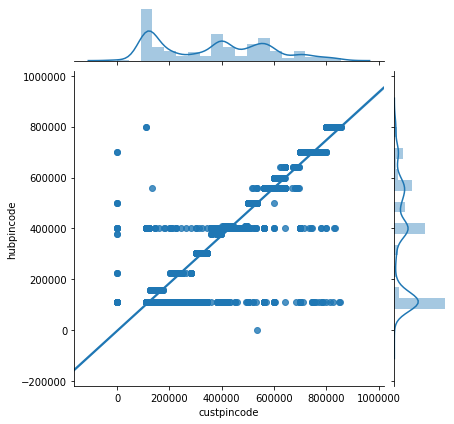

In [27]:
sns.jointplot(data=data, x="custpincode", y="hubpincode", kind="reg")

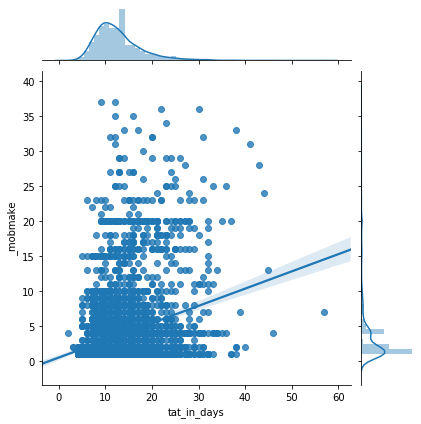

In [28]:
sns.jointplot(data=data, x="tat_in_days", y="_mobmake", kind="reg")

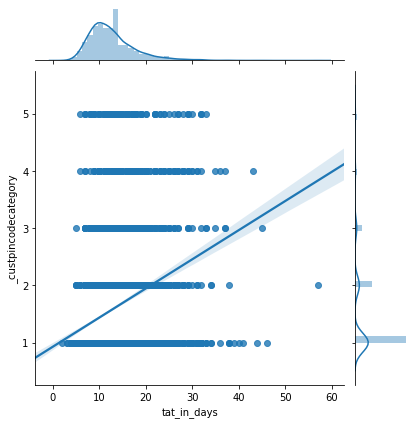

In [29]:
sns.jointplot(data=data, x="tat_in_days", y="_custpincodecategory", kind="reg")

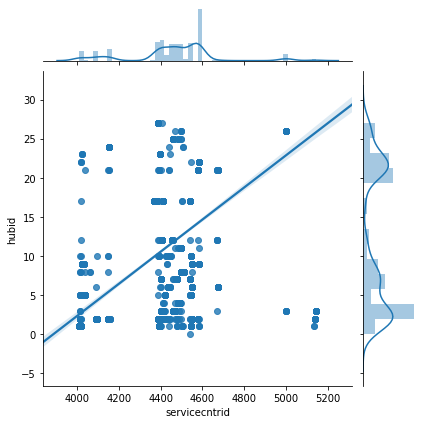

In [30]:
sns.jointplot(data=data, x="servicecntrid", y="hubid", kind="reg")

In [31]:
#enc = sl.preprocessing.OneHotEncoder()

In [32]:
#enc.fit({'ADLD' : 0, 'EW' : 1})

In [33]:
#memcreateddate          datetime64[ns]
#mobilepurchasedate      datetime64[ns]
#claimintdate            datetime64[ns]
#pickupStartdate         datetime64[ns]
data['memcreateddate_Y'] = data['memcreateddate'].dt.year
data['memcreateddate_M'] = data['memcreateddate'].dt.month
data['memcreateddate_D'] = data['memcreateddate'].dt.day

data['mobilepurchasedate_Y'] = data['mobilepurchasedate'].dt.year
data['mobilepurchasedate_M'] = data['mobilepurchasedate'].dt.month
data['mobilepurchasedate_D'] = data['mobilepurchasedate'].dt.day

data['claimintdate_M'] = data['claimintdate'].dt.month
data['claimintdate_D'] = data['claimintdate'].dt.day

data['pickupStartdate_M'] = data['pickupStartdate'].dt.month
data['pickupStartdate_D'] = data['pickupStartdate'].dt.day

In [34]:
data.corr()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,_claimtype,_custpincodecategory,...,memcreateddate_Y,memcreateddate_M,memcreateddate_D,mobilepurchasedate_Y,mobilepurchasedate_M,mobilepurchasedate_D,claimintdate_M,claimintdate_D,pickupStartdate_M,pickupStartdate_D
hubid,1.000000,-0.055715,0.033957,-0.001304,-0.151538,-0.022918,0.451190,-0.121613,-0.003411,0.088672,...,-0.072753,0.016543,0.011107,0.043721,-0.045780,-0.019976,0.253130,0.019949,0.263225,-0.003854
hubpincode,-0.055715,1.000000,-0.028212,-0.020470,-0.088960,0.926211,0.201244,-0.001505,0.010315,0.060210,...,-0.060340,0.051047,-0.016972,0.015342,0.015374,0.001581,-0.026474,0.002375,-0.029068,-0.008945
pickuppartnerid,0.033957,-0.028212,1.000000,0.243320,0.088534,-0.053867,0.039964,-0.085485,-0.032520,-0.236743,...,0.026786,-0.003160,0.003177,-0.004707,0.001683,-0.009410,0.077184,0.002615,0.065785,0.043129
deliverypartnerid,-0.001304,-0.020470,0.243320,1.000000,0.020992,-0.029602,0.018962,-0.072986,-0.063766,-0.091999,...,-0.006827,-0.001729,0.004265,-0.017533,-0.001277,-0.004264,0.004150,0.018762,0.019710,-0.013624
insuranceCompanyId,-0.151538,-0.088960,0.088534,0.020992,1.000000,-0.094457,-0.139533,-0.033617,0.044086,-0.081228,...,0.376371,-0.180737,-0.027290,0.001719,-0.013210,0.014370,0.034208,0.007220,0.023542,0.004003
custpincode,-0.022918,0.926211,-0.053867,-0.029602,-0.094457,1.000000,0.207607,0.048805,0.009147,0.111305,...,-0.043540,0.047797,-0.016301,0.025892,0.018245,-0.000338,-0.012414,0.002914,-0.018038,-0.002964
servicecntrid,0.451190,0.201244,0.039964,0.018962,-0.139533,0.207607,1.000000,-0.169008,-0.004271,0.058971,...,-0.085669,0.034398,0.015313,0.016530,-0.020037,0.007193,0.112225,0.013376,0.118162,-0.001618
tat_in_days,-0.121613,-0.001505,-0.085485,-0.072986,-0.033617,0.048805,-0.169008,1.000000,0.078633,0.276154,...,-0.021072,0.000218,0.013729,-0.039272,-0.002447,0.008021,-0.178945,-0.005395,-0.171576,0.016674
_claimtype,-0.003411,0.010315,-0.032520,-0.063766,0.044086,0.009147,-0.004271,0.078633,1.000000,-0.008758,...,-0.022355,-0.010509,-0.002315,-0.023982,-0.003964,0.017035,-0.005863,0.008023,-0.012865,0.026665
_custpincodecategory,0.088672,0.060210,-0.236743,-0.091999,-0.081228,0.111305,0.058971,0.276154,-0.008758,1.000000,...,0.020572,0.015949,0.019933,0.015348,0.022149,0.008266,-0.071608,0.027105,-0.062791,0.023056


In [35]:
data[data['pickuppartnerid'] !=data['deliverypartnerid']].shape

(1041, 25)

In [36]:
data.head()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,...,memcreateddate_Y,memcreateddate_M,memcreateddate_D,mobilepurchasedate_Y,mobilepurchasedate_M,mobilepurchasedate_D,claimintdate_M,claimintdate_D,pickupStartdate_M,pickupStartdate_D
0,7,500004,233,233,131,500001,2017-04-27,2016-12-02,2018-02-08,4403,...,2017,4,27,2016,12,2,2,8,2,13
1,10,226010,233,233,131,226022,2017-03-06,2017-03-05,2018-02-04,4444,...,2017,3,6,2017,3,5,2,4,2,8
2,2,110018,233,233,228,110018,2018-02-01,2018-01-27,2018-02-03,4388,...,2018,2,1,2018,1,27,2,3,2,12
3,2,110018,233,233,228,124001,2018-01-17,2018-01-31,2018-02-04,4092,...,2018,1,17,2018,1,31,2,4,2,14
4,21,110015,233,233,131,201301,2018-01-23,2018-01-20,2018-02-09,4580,...,2018,1,23,2018,1,20,2,9,2,14


In [37]:
data['insuranceCompanyId'].value_counts()

131    4701
228    1549
Name: insuranceCompanyId, dtype: int64

In [38]:
data['deliverypartnerid'].value_counts()

233    5630
245     493
201      71
0        56
Name: deliverypartnerid, dtype: int64

In [39]:
data['pickuppartnerid'].value_counts()

233    5599
308     306
201     275
0        70
Name: pickuppartnerid, dtype: int64

In [40]:
data['hubid'].value_counts()

2     1128
21     941
22     622
3      488
7      470
8      387
1      376
6      236
26     210
23     198
27     181
12     174
4      154
17     139
25     122
5      108
9       99
24      94
10      65
11      57
0        1
Name: hubid, dtype: int64

In [41]:
data['hubpincode'].value_counts()

110018    1128
110015     941
400104     622
560011     488
500004     470
700064     387
400059     376
160059     236
560066     210
400001     198
110034     181
302006     174
600024     154
800001     139
560037     122
380009     108
411016      99
110092      94
226010      65
641012      57
0            1
Name: hubpincode, dtype: int64

In [42]:
del data['hubid']

In [43]:
data.corr()

,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,_claimtype,_custpincodecategory,_mobmake,memcreateddate_Y,memcreateddate_M,memcreateddate_D,mobilepurchasedate_Y,mobilepurchasedate_M,mobilepurchasedate_D,claimintdate_M,claimintdate_D,pickupStartdate_M,pickupStartdate_D
hubpincode,1.000000,-0.028212,-0.020470,-0.088960,0.926211,0.201244,-0.001505,0.010315,0.060210,-0.062944,-0.060340,0.051047,-0.016972,0.015342,0.015374,0.001581,-0.026474,0.002375,-0.029068,-0.008945
pickuppartnerid,-0.028212,1.000000,0.243320,0.088534,-0.053867,0.039964,-0.085485,-0.032520,-0.236743,-0.008750,0.026786,-0.003160,0.003177,-0.004707,0.001683,-0.009410,0.077184,0.002615,0.065785,0.043129
deliverypartnerid,-0.020470,0.243320,1.000000,0.020992,-0.029602,0.018962,-0.072986,-0.063766,-0.091999,-0.021351,-0.006827,-0.001729,0.004265,-0.017533,-0.001277,-0.004264,0.004150,0.018762,0.019710,-0.013624
insuranceCompanyId,-0.088960,0.088534,0.020992,1.000000,-0.094457,-0.139533,-0.033617,0.044086,-0.081228,0.067050,0.376371,-0.180737,-0.027290,0.001719,-0.013210,0.014370,0.034208,0.007220,0.023542,0.004003
custpincode,0.926211,-0.053867,-0.029602,-0.094457,1.000000,0.207607,0.048805,0.009147,0.111305,-0.011802,-0.043540,0.047797,-0.016301,0.025892,0.018245,-0.000338,-0.012414,0.002914,-0.018038,-0.002964
servicecntrid,0.201244,0.039964,0.018962,-0.139533,0.207607,1.000000,-0.169008,-0.004271,0.058971,-0.349374,-0.085669,0.034398,0.015313,0.016530,-0.020037,0.007193,0.112225,0.013376,0.118162,-0.001618
tat_in_days,-0.001505,-0.085485,-0.072986,-0.033617,0.048805,-0.169008,1.000000,0.078633,0.276154,0.274437,-0.021072,0.000218,0.013729,-0.039272,-0.002447,0.008021,-0.178945,-0.005395,-0.171576,0.016674
_claimtype,0.010315,-0.032520,-0.063766,0.044086,0.009147,-0.004271,0.078633,1.000000,-0.008758,0.002026,-0.022355,-0.010509,-0.002315,-0.023982,-0.003964,0.017035,-0.005863,0.008023,-0.012865,0.026665
_custpincodecategory,0.060210,-0.236743,-0.091999,-0.081228,0.111305,0.058971,0.276154,-0.008758,1.000000,-0.019301,0.020572,0.015949,0.019933,0.015348,0.022149,0.008266,-0.071608,0.027105,-0.062791,0.023056
_mobmake,-0.062944,-0.008750,-0.021351,0.067050,-0.011802,-0.349374,0.274437,0.002026,-0.019301,1.000000,0.081890,-0.041487,0.004807,0.018140,0.000100,0.022323,-0.050817,-0.010082,-0.053419,0.011813


In [44]:
#model training

In [45]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=1)

In [135]:
del data['pickupStartdate']
del data['claimintdate']
del data['mobilepurchasedate']
del data['memcreateddate']
del data['insuranceCompanyId']

data=data[data['_mobmake'].isnull()==False]
data['_mobmake'] = data['_mobmake'].astype(int)

KeyError: 'pickupStartdate'

In [136]:
X = data.copy(deep=True)

In [137]:
del X['tat_in_days']

In [138]:
del X['_claimtype']

In [139]:
del X['hubpincode']
del X['custpincode']

In [140]:
Y = data['tat_in_days'].copy(deep=True)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)

In [142]:
X_train.shape

(4686, 15)

In [143]:
X_test.shape

(1562, 15)

In [144]:
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [145]:
X_poly.shape

(4686, 136)

In [146]:
model = LinearRegression()
model.fit(X_poly, y_train)
#y_poly_pred = model.predict(x_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
X_poly_test = poly.fit_transform(X_test) 
  
poly.fit(X_poly_test, y_test)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [148]:
y_pred = model.predict(X_poly_test)

In [149]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

In [150]:
rmse

4.391490458491294

In [151]:
model.score(X_poly_test, y_test)

0.22737103495890273

In [152]:
X.columns

Index(['pickuppartnerid', 'deliverypartnerid', 'servicecntrid',
       '_custpincodecategory', '_mobmake', 'memcreateddate_Y',
       'memcreateddate_M', 'memcreateddate_D', 'mobilepurchasedate_Y',
       'mobilepurchasedate_M', 'mobilepurchasedate_D', 'claimintdate_M',
       'claimintdate_D', 'pickupStartdate_M', 'pickupStartdate_D'],
      dtype='object')

In [153]:
#del data['pickupStartdate']
#del data['claimintdate']
#del data['mobilepurchasedate']
#del data['memcreateddate']

In [126]:
#X=X[X['_mobmake'].isnull()==False]

In [127]:
#X['_mobmake'] = X['_mobmake'].astype(int)

In [128]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X = data.copy(deep=True)
del X['tat_in_days']
del X['_claimtype']
Y = data['tat_in_days'].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_poly_test = poly.fit_transform(X_test) 
  
#poly.fit(X_poly_test, y_test)
y_pred = model.predict(X_poly_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

In [129]:
X_poly_test.shape

(1562, 171)

In [130]:
X_test.shape

(1562, 17)

In [131]:
rmse

4.418975829487782

In [132]:
model.score(X_poly_test, y_test)

0.21766934044283415

In [70]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4)
X = data.copy(deep=True)
del X['tat_in_days']
del X['_claimtype']
Y = data['tat_in_days'].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_poly_test = poly.fit_transform(X_test) 
  
poly.fit(X_poly_test, y_test)
y_pred = model.predict(X_poly_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

KeyboardInterrupt: 

In [ ]:
#from sklearn.svm import SVR
#regressor=SVR()
#regressor.fit(X_train,y_train)

In [ ]:
#pred=regressor.predict(X_test)
#print(regressor.score(y_train, pred))

In [196]:
test_data = pd.read_csv("Data/1906/problem_2_test.csv")

In [197]:
test_data.dtypes

srno                    int64
mobmake                object
hubid                   int64
hubpincode              int64
pickuppartnerid         int64
deliverypartnerid       int64
insuranceCompanyId      int64
custpincodecategory    object
claimtype              object
custpincode             int64
memcreateddate         object
mobilepurchasedate     object
claimintdate           object
servicecntrid           int64
pickupStartdate        object
dtype: object

In [198]:
test_data.memcreateddate = pd.to_datetime(test_data.memcreateddate)
test_data.mobilepurchasedate = pd.to_datetime(test_data.mobilepurchasedate)
test_data.claimintdate = pd.to_datetime(test_data.claimintdate)
test_data.pickupStartdate = pd.to_datetime(test_data.pickupStartdate)
test_data['_custpincodecategory'] = test_data.custpincodecategory.map(dict(zip(test_data.custpincodecategory.unique(), [1,2,3,4,5])))
test_data['_mobmake'] = test_data.mobmake.map(dict(zip(test_data.mobmake.unique(), list(range(1,len(test_data.mobmake.unique()))))))

del test_data['mobmake']
del test_data['custpincodecategory']
del test_data['claimtype']
del test_data['srno']
del test_data['hubid']
del test_data['insuranceCompanyId']
del test_data['hubpincode']
del test_data['custpincode']
test_data['_mobmake'].fillna(0, inplace=True)
test_data['_mobmake'] = test_data['_mobmake'].astype(int)

test_data['memcreateddate_Y'] = test_data['memcreateddate'].dt.year
test_data['memcreateddate_M'] = test_data['memcreateddate'].dt.month
test_data['memcreateddate_D'] = test_data['memcreateddate'].dt.day

test_data['mobilepurchasedate_Y'] = test_data['mobilepurchasedate'].dt.year
test_data['mobilepurchasedate_M'] = test_data['mobilepurchasedate'].dt.month
test_data['mobilepurchasedate_D'] = test_data['mobilepurchasedate'].dt.day

test_data['claimintdate_M'] = test_data['claimintdate'].dt.month
test_data['claimintdate_D'] = test_data['claimintdate'].dt.day

test_data['pickupStartdate_M'] = test_data['pickupStartdate'].dt.month
test_data['pickupStartdate_D'] = test_data['pickupStartdate'].dt.day

del test_data['pickupStartdate']
del test_data['claimintdate']
del test_data['mobilepurchasedate']
del test_data['memcreateddate']

In [199]:
test_data.head()

,pickuppartnerid,deliverypartnerid,servicecntrid,_custpincodecategory,_mobmake,memcreateddate_Y,memcreateddate_M,memcreateddate_D,mobilepurchasedate_Y,mobilepurchasedate_M,mobilepurchasedate_D,claimintdate_M,claimintdate_D,pickupStartdate_M,pickupStartdate_D
0,233,233,4467,1,1,2017,7,30,2017,7,27,2,1,2,6
1,233,233,4388,1,2,2017,7,17,2017,1,25,2,1,2,8
2,233,233,4460,2,2,2018,1,12,2018,1,11,2,21,2,28
3,233,233,4388,3,2,2017,8,7,2017,5,21,2,16,2,26
4,233,233,4581,2,1,2017,11,10,2017,9,22,2,20,2,23


In [200]:
test_data.columns

Index(['pickuppartnerid', 'deliverypartnerid', 'servicecntrid',
       '_custpincodecategory', '_mobmake', 'memcreateddate_Y',
       'memcreateddate_M', 'memcreateddate_D', 'mobilepurchasedate_Y',
       'mobilepurchasedate_M', 'mobilepurchasedate_D', 'claimintdate_M',
       'claimintdate_D', 'pickupStartdate_M', 'pickupStartdate_D'],
      dtype='object')

In [201]:
X_poly_test_data = poly.fit_transform(test_data)   
y_pred = model.predict(X_poly_test_data)

In [202]:
test_data_for_write = pd.read_csv("Data/1906/problem_2_test.csv")

In [203]:
test_data.shape

(2116, 15)

In [204]:
X_poly_test_data.shape

(2116, 136)

In [205]:
test_data_for_write.shape

(2116, 15)

In [206]:
len(y_pred)

2116

In [207]:
test_data_for_write['tat-in-days'] = y_pred

In [209]:
test_data_for_write.to_csv("ML Ass,Problem-2.csv")